In [1]:
%matplotlib inline

import json
import logging
import sys

import matplotlib.pyplot as plt
from numpy import median, mean, std


def draw_plot(name, stats, btc_profit):
    plt.figure(dpi=100)
    plt.axvline(btc_profit, color='k', linestyle='dashed', linewidth=1)
    profits = [s['profit_multiplier'] for s in stats]
    plt.hist(profits, bins=100)
    plt.axvline(median(profits), color='r', linewidth=1)
    plt.title(name)
    plt.show()


def log_stats(name, stats):
    if name == 'BTC':
        logging.info('*BTC*: {:.4f}'.format(stats[0]['profit_multiplier']))
    elif name == 'HODL':
        profits = [s['profit_multiplier'] for s in stats]
        logging.info('*{}*: mean {:.4f}, median {:.4f}, deviation {:.4f}'.format(
            name,
            mean(profits),
            median(profits),
            std(profits),
        ))
    else:
        profits = [s['profit_multiplier'] for s in stats]
        logging.info('*{}*: median {:.4f}, rebalances: {:.0f}, tx_fee: ${:.0f}'.format(
            name,
            mean(profits),
            median(profits),
            std(profits),
            median([s['arbitrage_count'] for s in stats]),
            median([s['total_tx_fees'] for s in stats]),
        ))
        if name == 'ARBITRAGE':
            arbiter_profit = [s['total_arbiter_profit'] for s in stats]
            logging.info('Arbiter profit: mean ${:.0f}, median ${:.0f}, deviation ${:.0f}'.format(
                mean(arbiter_profit),
                median(arbiter_profit),
                std(arbiter_profit),
            ))

order = {
    'BTC': 0,
    'HODL': 1,
    '5 MIN': 2,
    '10 MIN': 3,
    '30 MIN': 4,
    'HOUR': 5,
    'DAY': 6,
    'WEEK': 7,
    '2 WEEK': 8,
    'MONTH': 9,
    '5%': 10,
    '10%': 11,
    '20%': 12,
    '50%': 13,
    '100%': 14,
    'ARBITRAGE': 15
}

In [2]:
logging.root.setLevel(logging.INFO)
logging.basicConfig(format='%(message)s')

files = {
    '3-6 tokens, ALL': 'test_data/test_3_6_1_5_1000_all.json',
    '3-6 tokens, UP': 'test_data/test_3_6_1_5_1000_up.json',
    '3-6 tokens, DOWN': 'test_data/test_3_6_1_5_1000_down.json',
    '10-20 tokens, ALL': 'test_data/test_10_20_1_5_1000_all.json'
}

3-6 tokens, ALL

*BTC*: 1.0788
*HODL*: mean 2.5528, median 2.0449, deviation 1.7914
*5 MIN*: median 2.9914, rebalances: 2, tx_fee: $3
*10 MIN*: median 2.9094, rebalances: 2, tx_fee: $2
*30 MIN*: median 2.7938, rebalances: 2, tx_fee: $2
*HOUR*: median 2.6409, rebalances: 2, tx_fee: $2
*DAY*: median 2.5458, rebalances: 2, tx_fee: $2
*WEEK*: median 2.7287, rebalances: 2, tx_fee: $2
*2 WEEK*: median 2.9700, rebalances: 2, tx_fee: $3
*MONTH*: median 3.2897, rebalances: 2, tx_fee: $3
*5%*: median 5.1614, rebalances: 3, tx_fee: $5
*10%*: median 3.9514, rebalances: 3, tx_fee: $3
*20%*: median 3.6464, rebalances: 3, tx_fee: $3
*50%*: median 3.5861, rebalances: 3, tx_fee: $3
*100%*: median 3.4937, rebalances: 3, tx_fee: $3
*ARBITRAGE*: median 2.6099, rebalances: 2, tx_fee: $2
Arbiter profit: mean $1724458, median $1255325, deviation $1451003


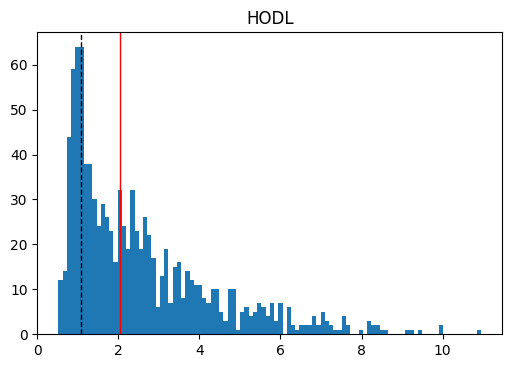

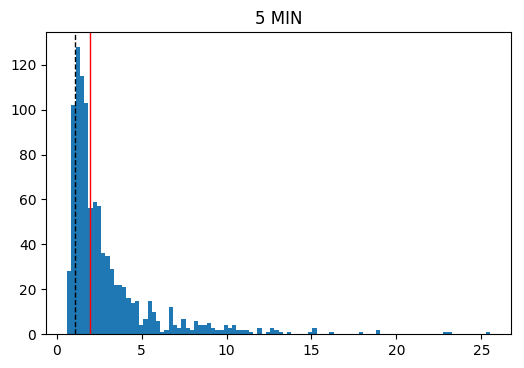

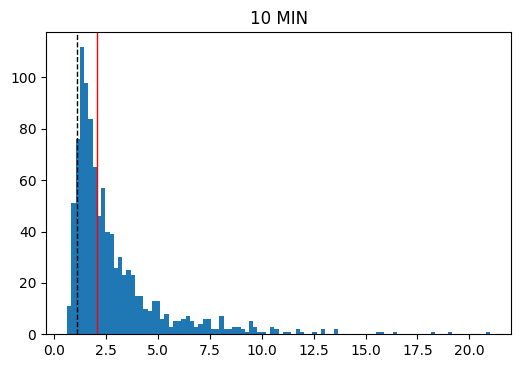

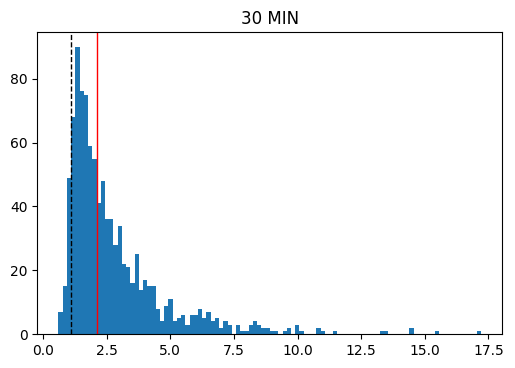

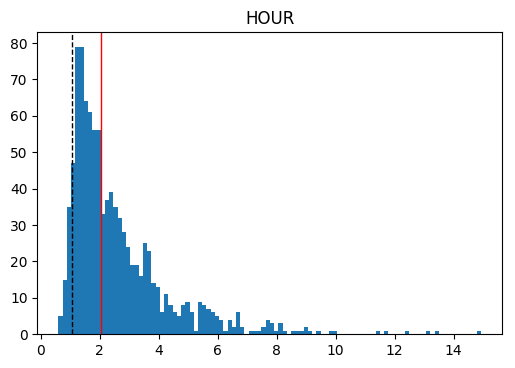

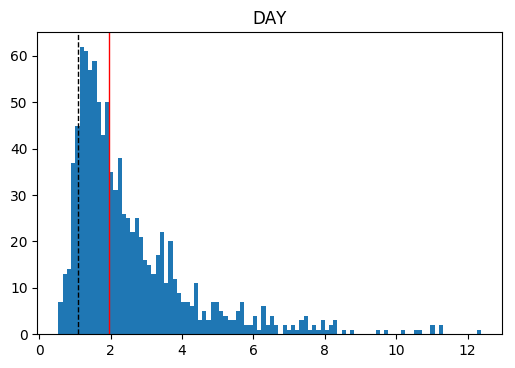

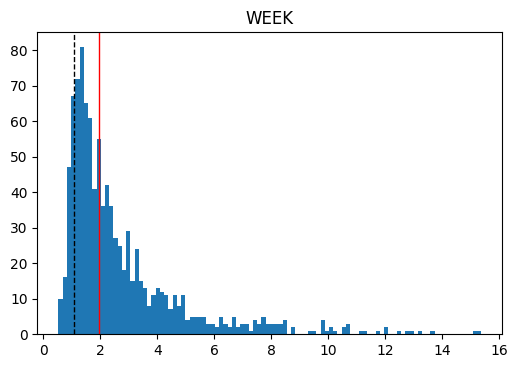

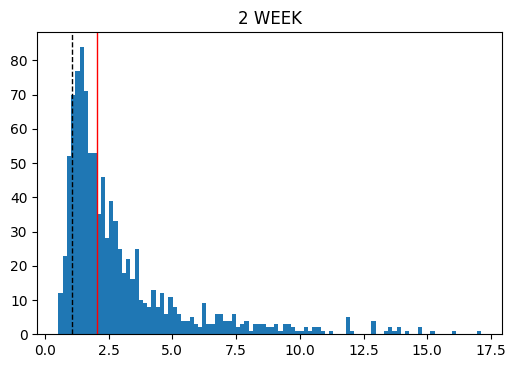

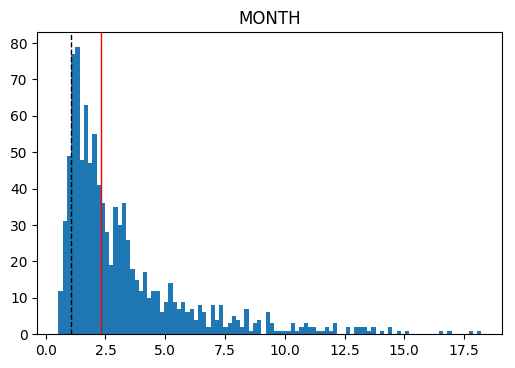

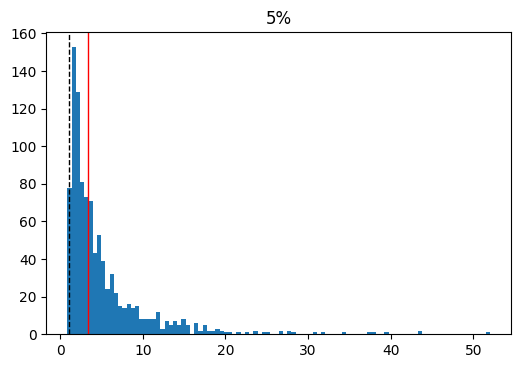

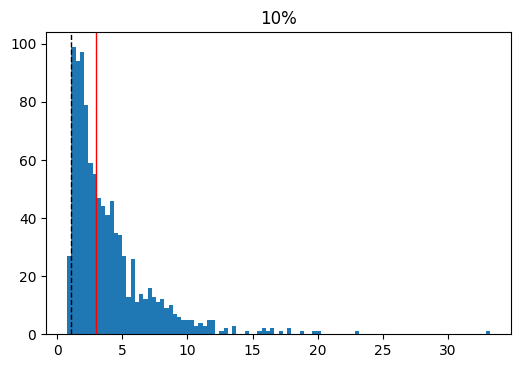

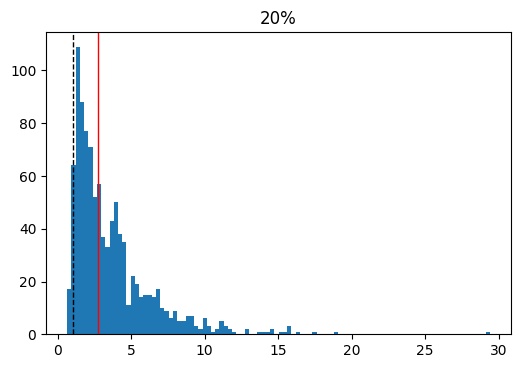

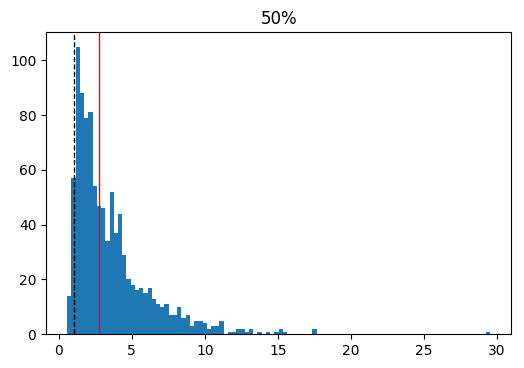

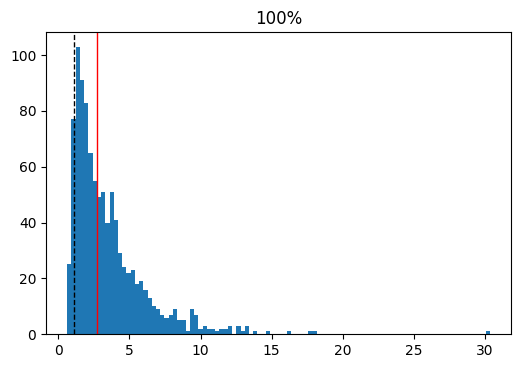

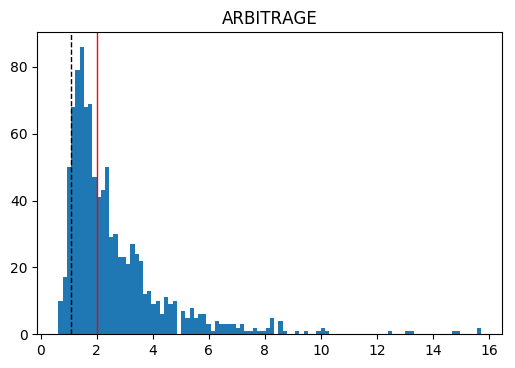

3-6 tokens, UP

*BTC*: 2.2528
*HODL*: mean 8.8441, median 5.8353, deviation 7.6900
*5 MIN*: median 9.8149, rebalances: 7, tx_fee: $9
*10 MIN*: median 9.1860, rebalances: 7, tx_fee: $7
*30 MIN*: median 8.4736, rebalances: 7, tx_fee: $6
*HOUR*: median 7.9379, rebalances: 6, tx_fee: $5
*DAY*: median 7.8506, rebalances: 6, tx_fee: $5
*WEEK*: median 8.4676, rebalances: 6, tx_fee: $6
*2 WEEK*: median 9.1464, rebalances: 6, tx_fee: $7
*MONTH*: median 10.2568, rebalances: 7, tx_fee: $9
*5%*: median 15.2050, rebalances: 9, tx_fee: $16
*10%*: median 11.7880, rebalances: 9, tx_fee: $9
*20%*: median 10.9059, rebalances: 8, tx_fee: $8
*50%*: median 10.7168, rebalances: 8, tx_fee: $8
*100%*: median 10.6221, rebalances: 8, tx_fee: $8
*ARBITRAGE*: median 7.9964, rebalances: 6, tx_fee: $5
Arbiter profit: mean $1210976, median $814936, deviation $1070949


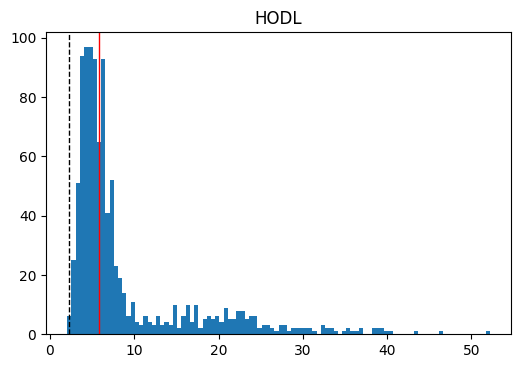

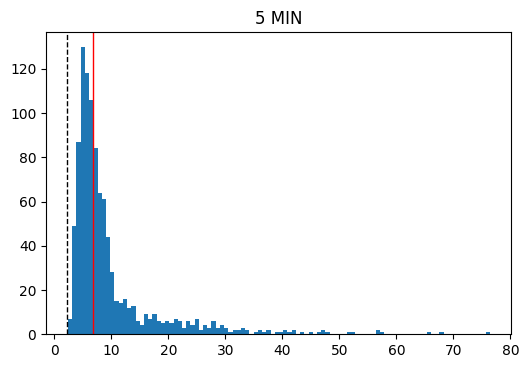

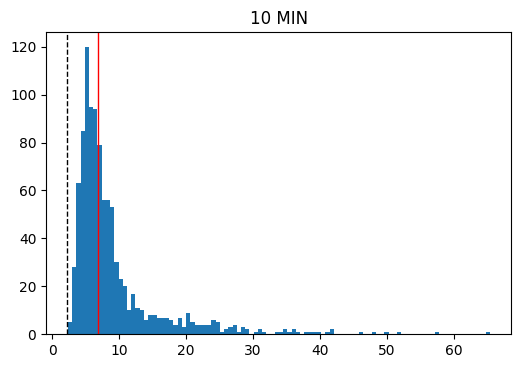

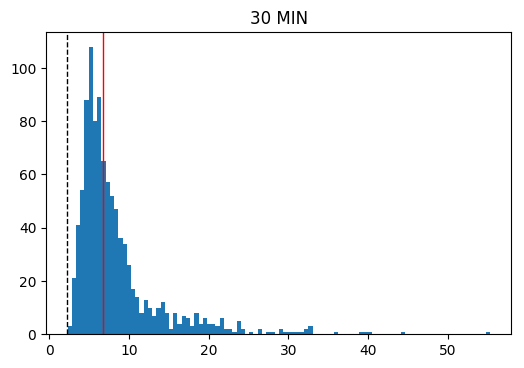

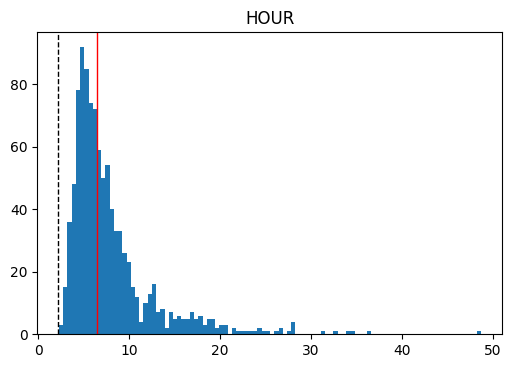

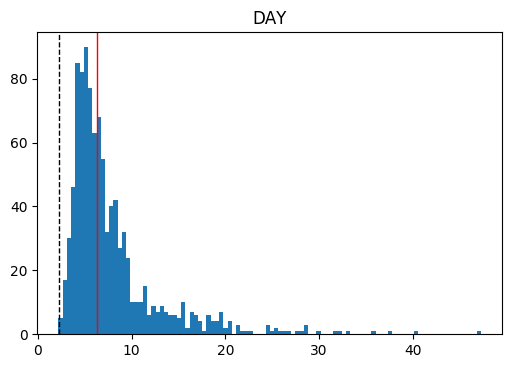

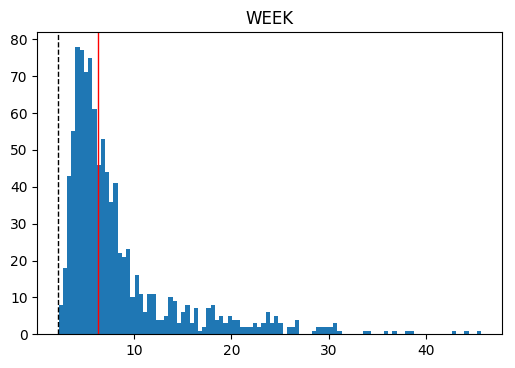

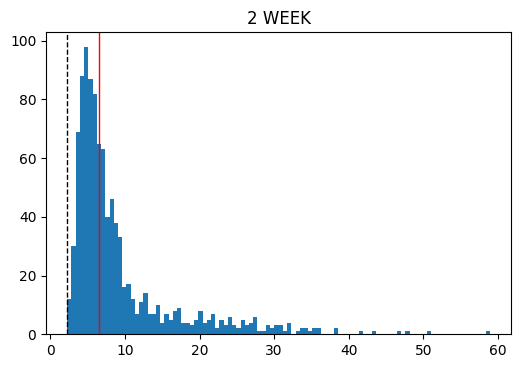

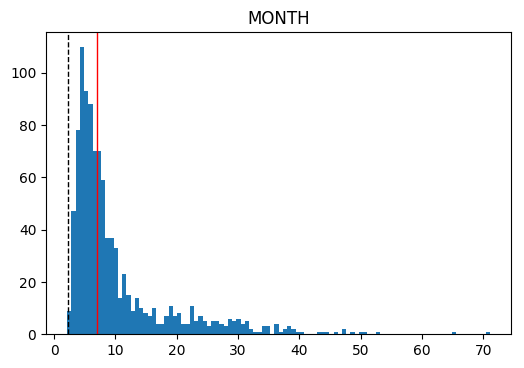

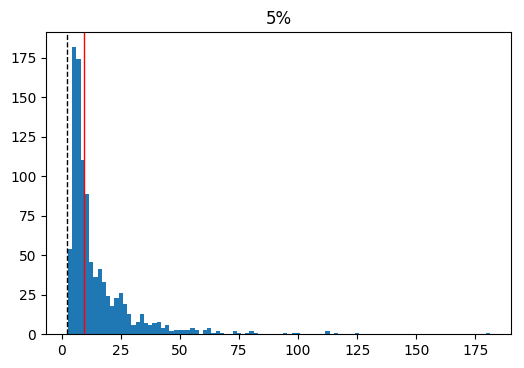

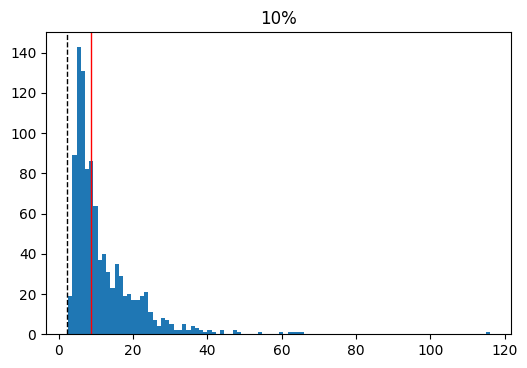

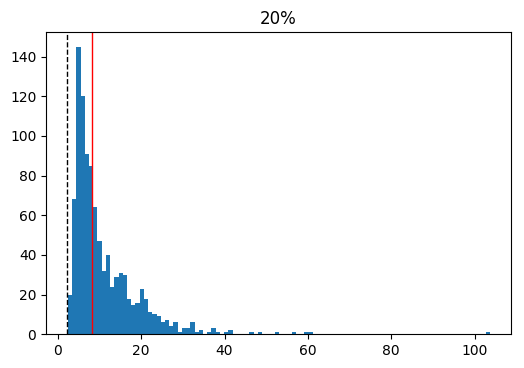

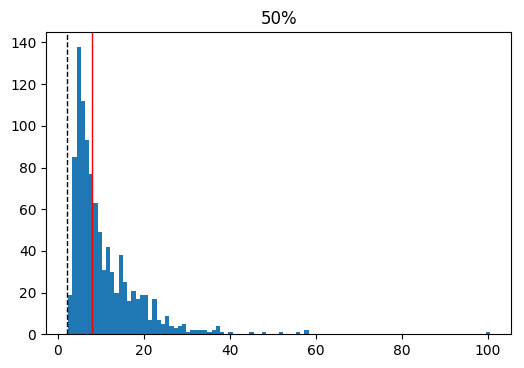

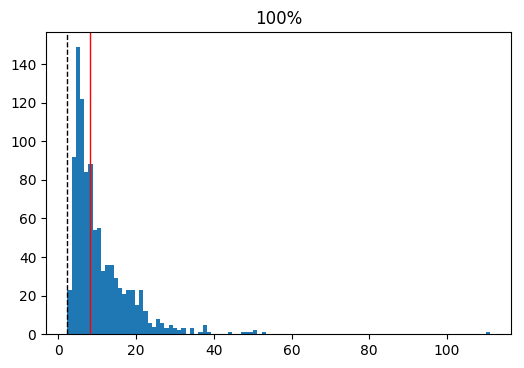

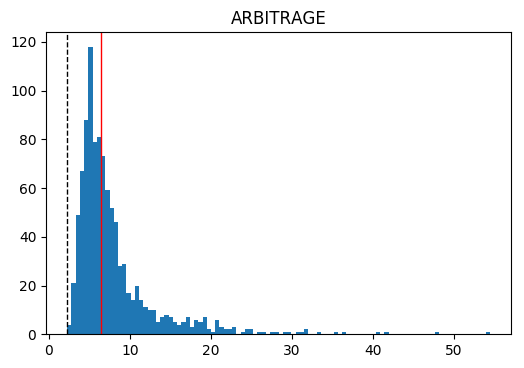

3-6 tokens, DOWN

*BTC*: 0.4777
*HODL*: mean 0.3270, median 0.3133, deviation 0.1061
*5 MIN*: median 0.1560, rebalances: 0, tx_fee: $0
*10 MIN*: median 0.2386, rebalances: 0, tx_fee: $0
*30 MIN*: median 0.3055, rebalances: 0, tx_fee: $0
*HOUR*: median 0.3224, rebalances: 0, tx_fee: $0
*DAY*: median 0.3238, rebalances: 0, tx_fee: $0
*WEEK*: median 0.3226, rebalances: 0, tx_fee: $0
*2 WEEK*: median 0.3278, rebalances: 0, tx_fee: $0
*MONTH*: median 0.3340, rebalances: 0, tx_fee: $0
*5%*: median 0.3430, rebalances: 0, tx_fee: $0
*10%*: median 0.3412, rebalances: 0, tx_fee: $0
*20%*: median 0.3405, rebalances: 0, tx_fee: $0
*50%*: median 0.3399, rebalances: 0, tx_fee: $0
*100%*: median 0.3379, rebalances: 0, tx_fee: $0
*ARBITRAGE*: median 0.3205, rebalances: 0, tx_fee: $0
Arbiter profit: mean $52162, median $47525, deviation $26066


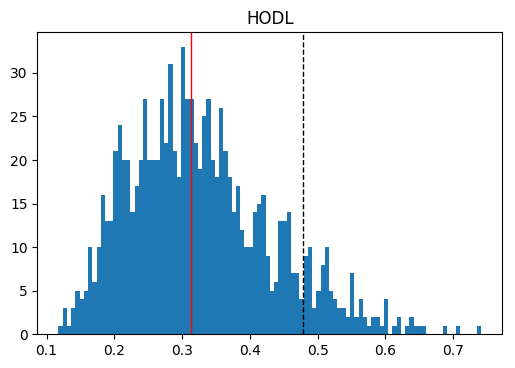

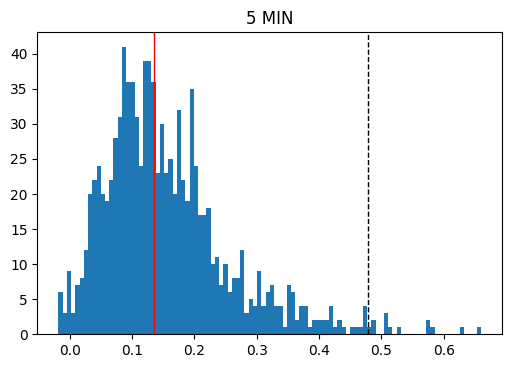

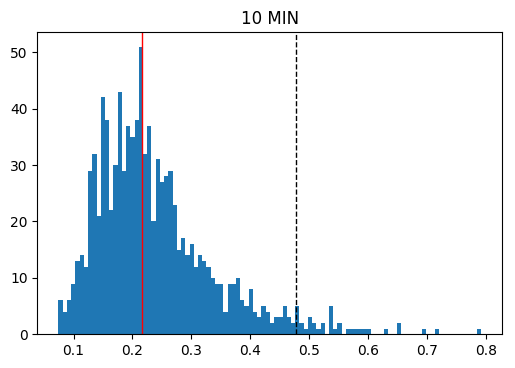

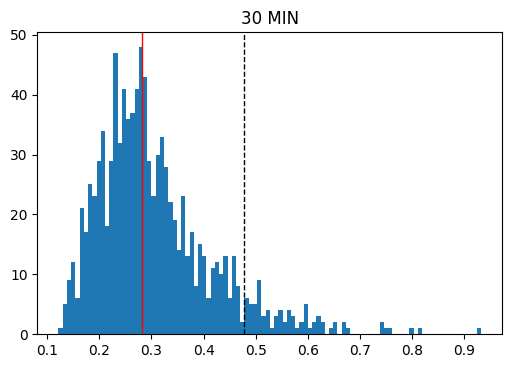

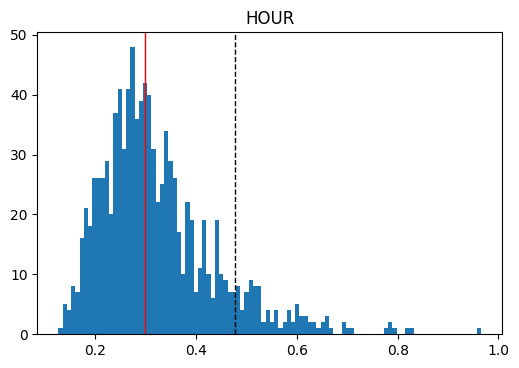

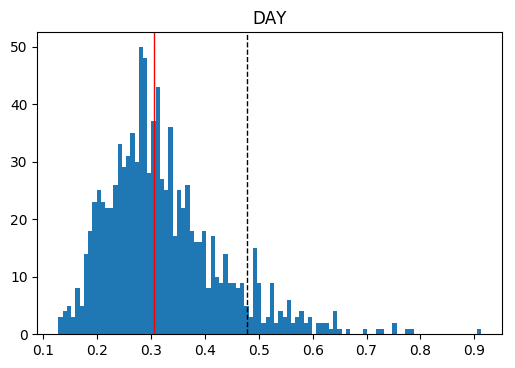

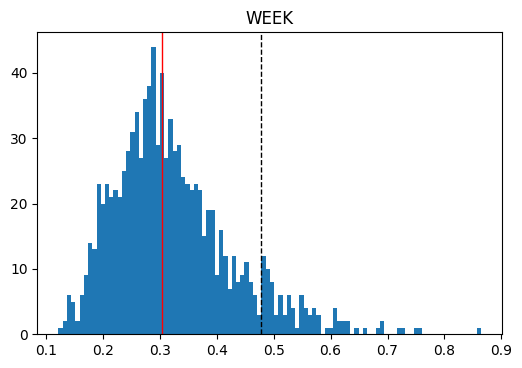

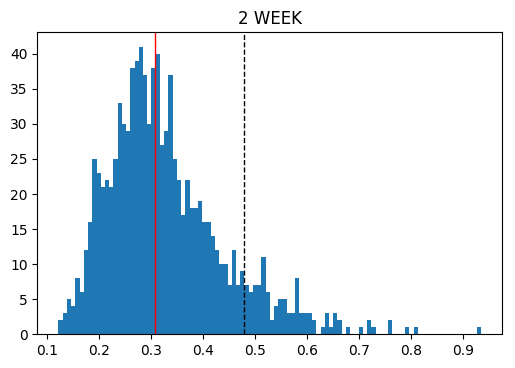

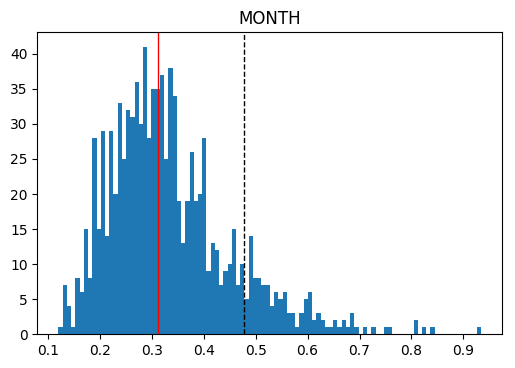

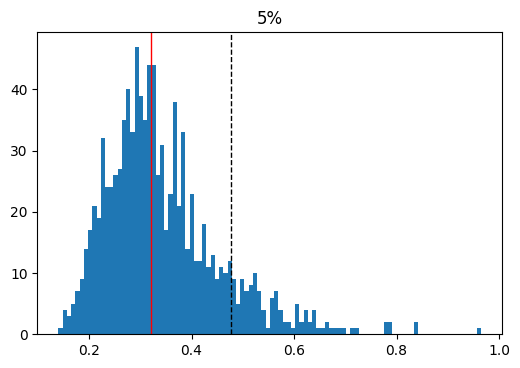

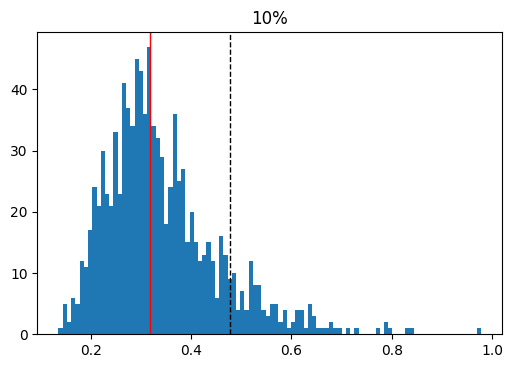

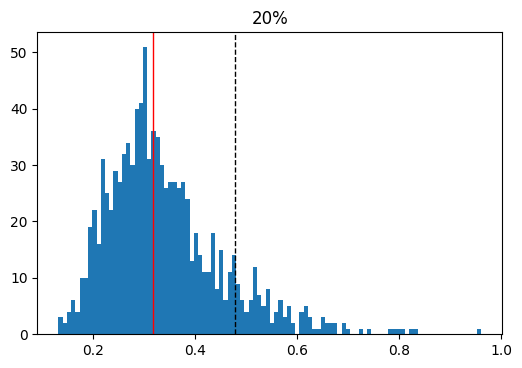

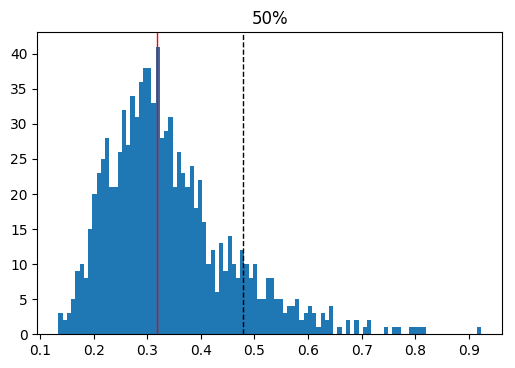

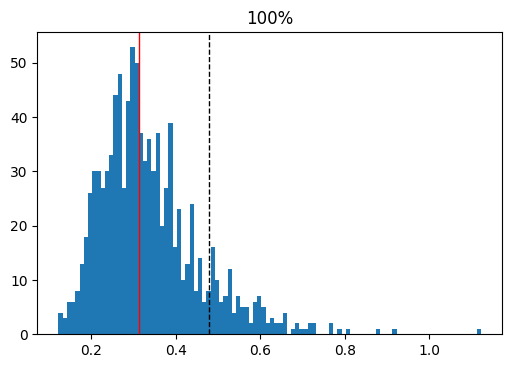

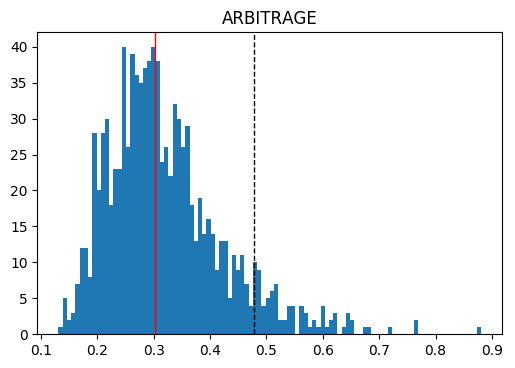

10-20 tokens, ALL

*BTC*: 1.0788
*HODL*: mean 2.5367, median 2.5039, deviation 0.6977
*5 MIN*: median 2.1057, rebalances: 2, tx_fee: $1
*10 MIN*: median 2.4318, rebalances: 2, tx_fee: $1
*30 MIN*: median 2.6057, rebalances: 3, tx_fee: $1
*HOUR*: median 2.5302, rebalances: 2, tx_fee: $1
*DAY*: median 2.4513, rebalances: 2, tx_fee: $1
*WEEK*: median 2.6220, rebalances: 2, tx_fee: $1
*2 WEEK*: median 2.8922, rebalances: 3, tx_fee: $1
*MONTH*: median 3.4253, rebalances: 3, tx_fee: $1
*5%*: median 5.8081, rebalances: 5, tx_fee: $3
*10%*: median 4.6317, rebalances: 4, tx_fee: $2
*20%*: median 4.1405, rebalances: 4, tx_fee: $1
*50%*: median 4.0434, rebalances: 4, tx_fee: $1
*100%*: median 3.9306, rebalances: 4, tx_fee: $1
*ARBITRAGE*: median 2.3385, rebalances: 2, tx_fee: $1
Arbiter profit: mean $1525201, median $1467775, deviation $436961


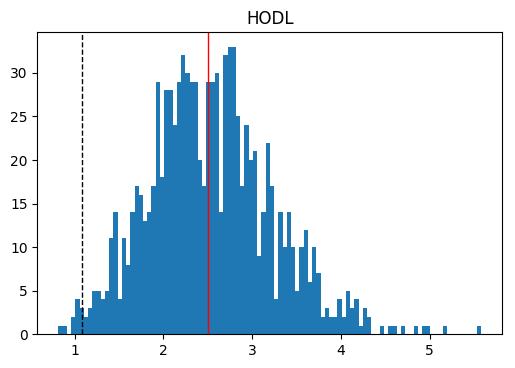

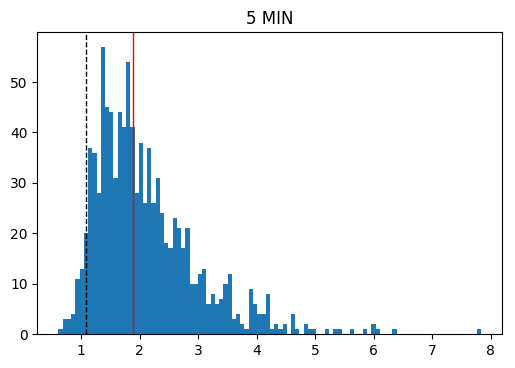

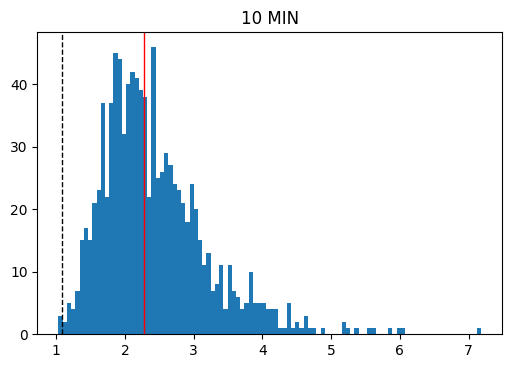

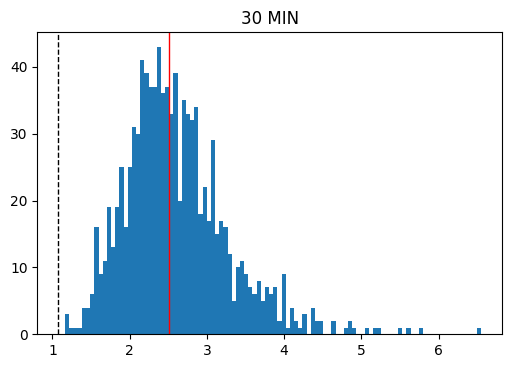

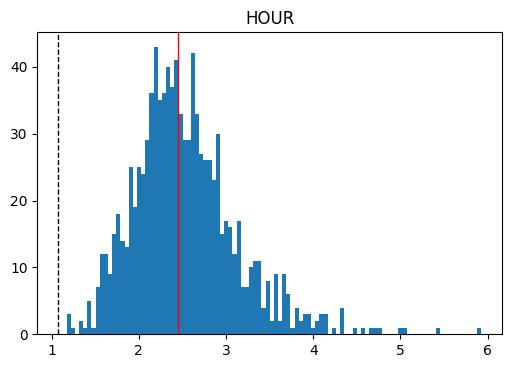

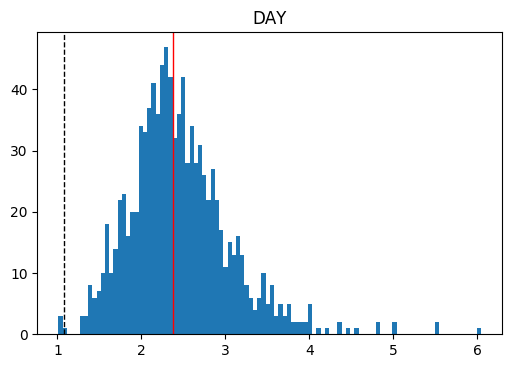

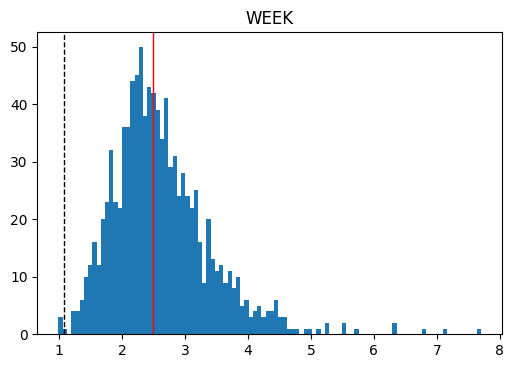

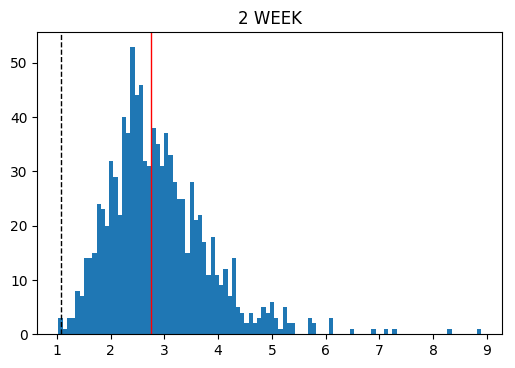

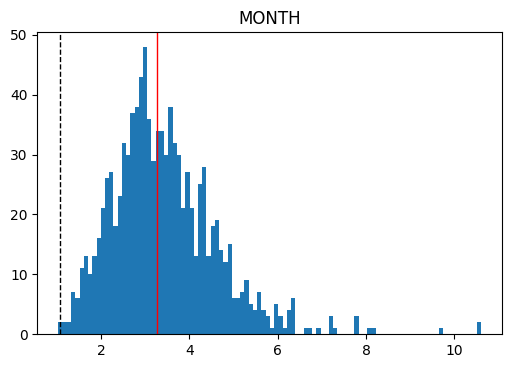

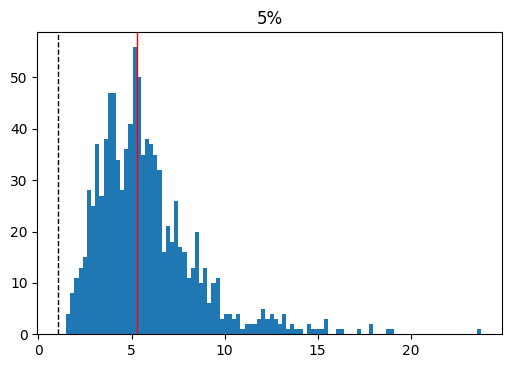

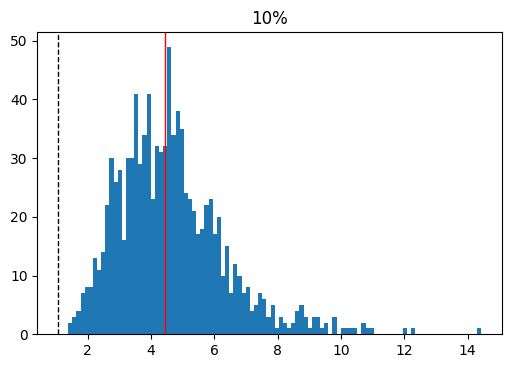

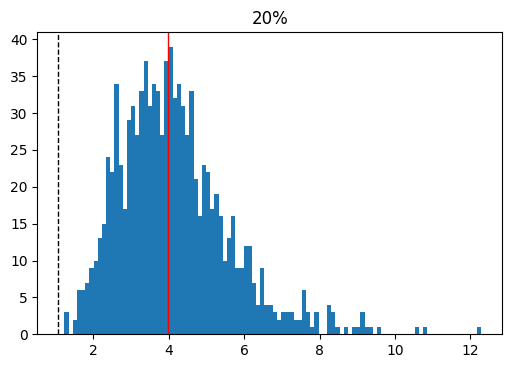

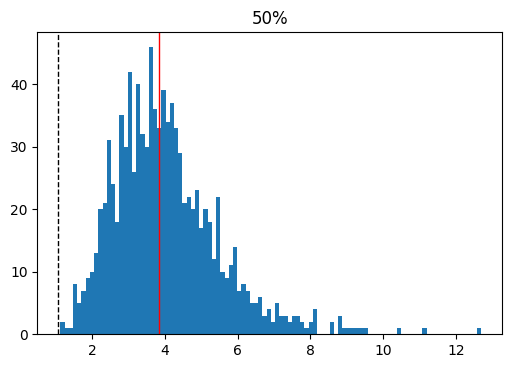

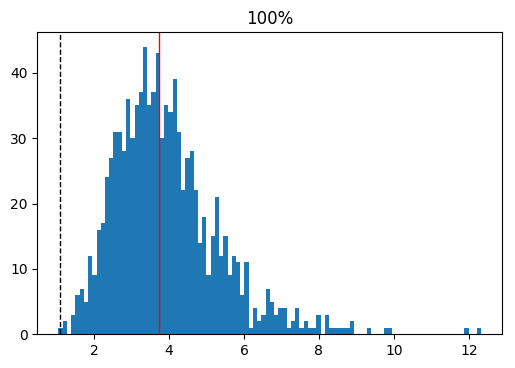

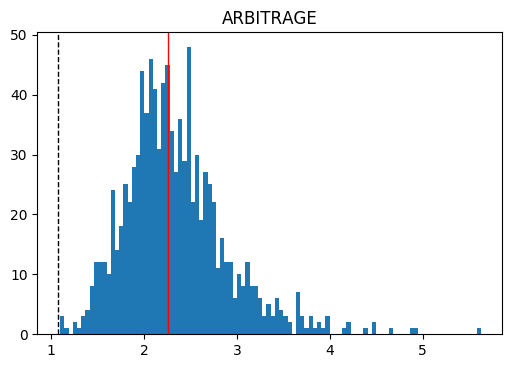

In [3]:
for title, filename in files.items():
    with open(filename) as in_f:
        all_stats = json.load(in_f)

    btc_profit = all_stats['BTC'][0]['profit_multiplier']

    logging.info(title)
    logging.info('')
    for name, stats in sorted(all_stats.items(), key=lambda x: order[x[0]]):
        log_stats(name, stats)

    for name, stats in sorted(all_stats.items(), key=lambda x: order[x[0]]):
        if name == 'BTC':
            continue
        draw_plot(name, stats, btc_profit)